In [1]:
"""Minimal script for generating an image using pre-trained StyleGAN generator."""

import os
import pickle
import IPython.display as ipd
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

In [2]:
# Initialize TensorFlow.
tflib.init_tf()

# Load pre-trained network.
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

# Print network details.
Gs.print_layers()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2       

In [3]:
%%time
# Pick latent vector.
rnd = np.random.RandomState(5)
latents = rnd.randn(1, Gs.input_shape[1])

# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

# Save image.
# os.makedirs(config.result_dir, exist_ok=True)
# png_filename = os.path.join(config.result_dir, 'example.png')
example = PIL.Image.fromarray(images[0], 'RGB')

CPU times: user 3.3 s, sys: 484 ms, total: 3.78 s
Wall time: 3.77 s


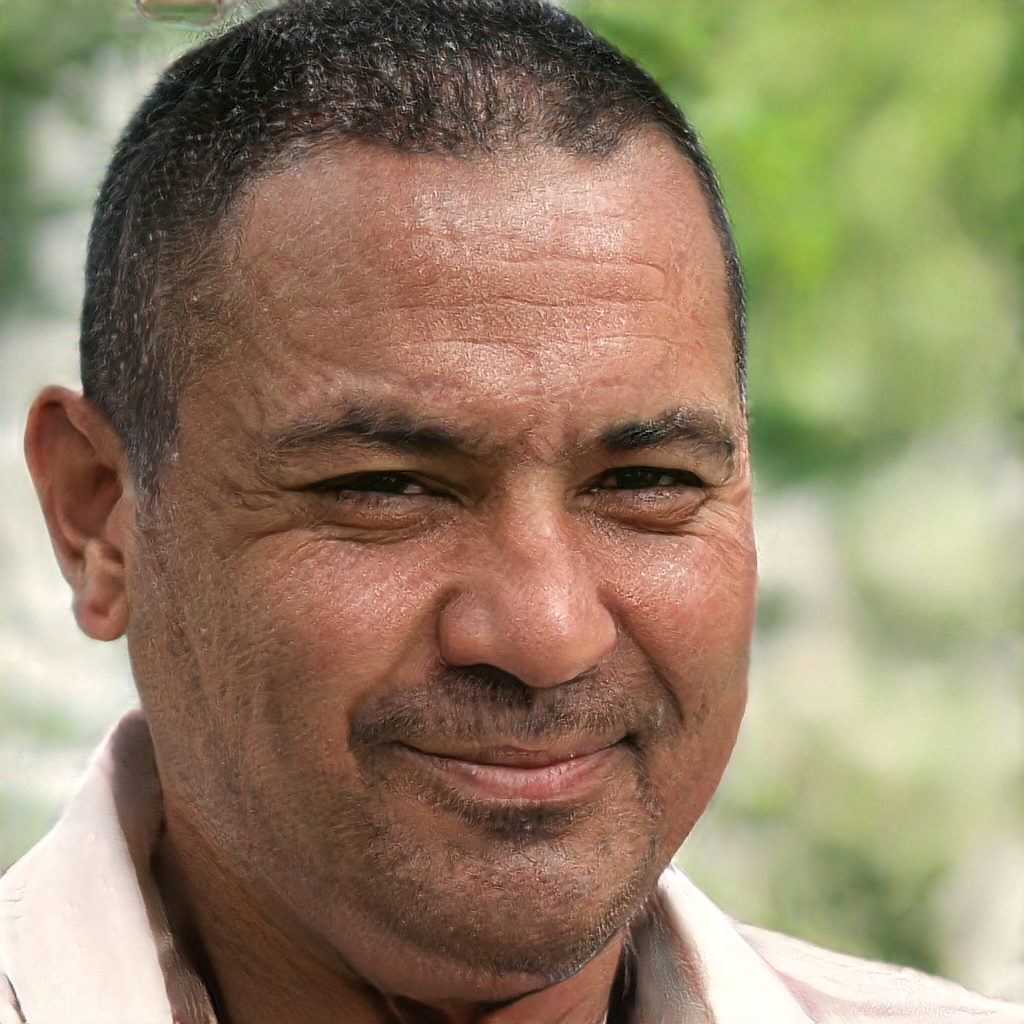

In [4]:
ipd.display(example)